In [ ]:
#%pip install sklearn

## Data

In [135]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X = np.load('observations_l2rpn100.npy')
y0 = np.load('labels0_l2rpn100.npy')
y1 = np.load('labels1_l2rpn100.npy')

In [136]:
np.random.seed(0)

nul_mask0 = np.where(y0 == 0)[0]
nul_mask1 = np.where(y1 == 0)[0]
mask0 = y0 != 0
mask1 = y1 != 0

# We take fewer null actions
selected_null_actions0 = np.random.choice(nul_mask0, size=4*np.sum(mask0))
selected_null_actions1 = np.random.choice(nul_mask1, size=4*np.sum(mask1))

mask0[selected_null_actions0] = True
mask1[selected_null_actions1] = True

print('X.shape = ', X.shape)
X0 = X[mask0].copy()
y00 = y0[mask0].copy()
print('X0.shape = ', X0.shape)

X1 = X[mask1].copy()
y11 = y1[mask1].copy()
print('X1.shape = ', X1.shape)

X.shape =  (81187, 467)
X0.shape =  (16691, 467)
X1.shape =  (36932, 467)


In [137]:
X_train0, X_test0, y0_train, y0_test = train_test_split(X0, y00, random_state=0, shuffle=True)
X_train1, X_test1, y1_train, y1_test = train_test_split(X1, y11, random_state=0, shuffle=True)

In [138]:
np.bincount(y0)
# TODO matrice de confusion
# TODO voir lightgbm

array([77591,     0,     0,     0,   188,     3,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     1,   785,     0,
           0,     0,     0,     0,     0,     0,   870,     0,     0,
           0,   128,     0,     0,     0,     0,   127,   130,     0,
           0,     0,   468,     0,    35,     2,    20,     1,     0,
           2,     0,     1,     0,   345,     0,     1,     2,     0,
           0,     0,     8,     0,    70,     0,     0,     0,     0,
         201,     0,     0,     0,     0,     0,    28,     4,    61,
         115])

In [157]:
import pickle as pk
with open('agent0_predictor_forest_l2rpn.pkl', 'rb') as f:
    model0 = pickle.load(f)

with open('agent1_predictor_forest_l2rpn.pkl', 'rb') as f:
    model1 = pickle.load(f)

/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


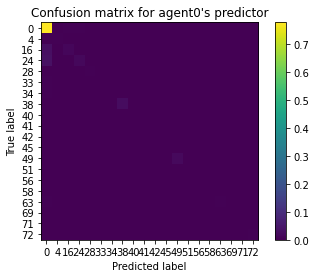

/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


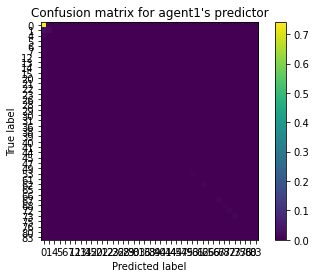

In [158]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
plot_confusion_matrix(model0, X_test0, y0_test, normalize='all', include_values=False)
plt.title('Confusion matrix for agent0\'s predictor')
plt.show()

plot_confusion_matrix(model1, X_test1, y1_test, normalize='all', include_values=False)
plt.title('Confusion matrix for agent1\'s predictor')
plt.show()

## Random forest

### Agent 0

In [139]:
model0 = RandomForestClassifier(random_state=0)
model0.fit(X_train0, y0_train)

RandomForestClassifier(random_state=0)

In [140]:
from sklearn.metrics import accuracy_score
accuracy_score(model0.predict(X_test0), y0_test)

0.8794632159118141

In [141]:
mask = y0_test != 0

accuracy_score(model0.predict(X_test0)[mask], y0_test[mask])

0.5005861664712778

In [142]:
# grid search
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators':range(50, 300, 50), 
    'criterion':("gini", "entropy", "log_loss"),
    'min_samples_split' : range(2, 10),
    
}
m = RandomForestClassifier()
c = GridSearchCV(m, parameters, verbose=3, n_jobs=-2)
c.fit(X0, y00)
np.save('results_grid_search0_forest_l2rpn.npy', arr=c.cv_results_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=50;, score=0.875 total time=  12.3s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=50;, score=0.869 total time=  12.3s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=50;, score=0.870 total time=  12.5s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=50;, score=0.852 total time=  12.5s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=50;, score=0.872 total time=  12.7s
[CV 5/5] END criterion=gini, min_samples_split=2, n_estimators=100;, score=0.856 total time=  23.4s
[CV 1/5] END criterion=gini, min_samples_split=2, n_estimators=100;, score=0.876 total time=  23.6s
[CV 3/5] END criterion=gini, min_samples_split=2, n_estimators=100;, score=0.872 total time=  23.8s
[CV 2/5] END criterion=gini, min_samples_split=2, n_estimators=100;, score=0.871 total time=  24.1s
[CV 4/5] END criterion=gini, min_samples_split=2, n_estimators=100;, score=0.864 total time=  24.3s
[CV 1

In [143]:
idx = np.argmax(c.cv_results_['mean_test_score'])
print(c.cv_results_['params'][idx])
print('test score : ', c.cv_results_['mean_test_score'][idx])

{'criterion': 'log_loss', 'min_samples_split': 6, 'n_estimators': 150}
test score :  0.8720264406111766


In [144]:
c.best_estimator_

RandomForestClassifier(criterion='log_loss', min_samples_split=6,
                       n_estimators=150)

In [166]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


best_model0 = RandomForestClassifier(n_estimators=150, criterion='log_loss', min_samples_split=6)
best_model0.fit(X_train0, y0_train)
accuracy_score(best_model0.predict(X_test0), y0_test)


0.970931664778046

In [146]:
f1_score(best_model0.predict(X_test0), y0_test, average='weighted')

0.8995310107849328

In [167]:
mask = y0_test != 0

accuracy_score(best_model0.predict(X_test0)[mask], y0_test[mask])

0.37445414847161573

In [168]:
mask = y0_test == 0

accuracy_score(best_model0.predict(X_test0)[mask], y0_test[mask])

0.9991228522780042

In [149]:
# Save the model
import pickle
pkl_file = "agent0_predictor_forest_l2rpn.pkl"

with open(pkl_file, 'wb') as f:
    pickle.dump(best_model0, f)

### Agent 1

In [150]:
# grid search
parameters = {
    'n_estimators':range(50, 300, 50), 
    'criterion':("gini", "entropy", "log_loss"),
    'min_samples_split' : range(2, 10),
    
}
m = RandomForestClassifier()
c = GridSearchCV(m, parameters, n_jobs=-2)
c.fit(X1, y11)
np.save('results_grid_search1_forest_l2rpn.npy', arr=c.cv_results_)

/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [169]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

X_train1, X_test1, y1_train, y1_test = train_test_split(X, y1, random_state=0, shuffle=True)

best_model1 = RandomForestClassifier(criterion='log_loss', n_estimators=250, min_samples_split=8)
best_model1.fit(X_train1, y1_train)
accuracy_score(best_model1.predict(X_test1), y1_test)


0.9197911021333202

In [170]:
mask = y1_test != 0

accuracy_score(best_model1.predict(X_test1)[mask], y1_test[mask])

0.30689964157706096

In [153]:
np.bincount(y1)

array([72338,  1774,     0,     0,   552,    12,   183,   206,     0,
           0,     0,     0,    97,   258,    26,   297,     0,     0,
           0,     0,   241,   250,   134,   198,     0,     0,     1,
           0,   115,   138,     3,   325,     0,     0,     0,     0,
         432,     2,   296,   209,     7,    67,     0,     0,    10,
          72,    11,    13,     0,    88,     0,     0,     0,   311,
           0,     0,     0,     0,     0,     0,     1,    52,   354,
           0,     0,     7,    28,   401,   356,     0,     0,     0,
         459,   454,     0,   195,   140,     0,     1,     0,    69,
           0,     2,     2])

In [171]:
mask = y1_test == 0

accuracy_score(best_model1.predict(X_test1)[mask], y1_test[mask])

0.995516191530584

In [155]:
c.best_estimator_

RandomForestClassifier(criterion='log_loss', min_samples_split=8,
                       n_estimators=250)

In [156]:
# Save the model
import pickle
pkl_file = "agent1_predictor_forest_l2rpn.pkl"

with open(pkl_file, 'wb') as f:
    pickle.dump(best_model1, f)

## Gradient Boosting

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

### Agent 0

In [88]:
# grid search
parameters = {
    'n_estimators':range(100, 300, 50), 
    'learning_rate':[
        0.01, 0.02, 0.05, 
        0.1, 0.2 
    ],
    'min_samples_split' : [4],
}
m = GradientBoostingClassifier()
c = GridSearchCV(m, parameters, verbose=3, n_jobs=-2)
c.fit(X0, y00)
np.save('results_grid_search0_gb_l2rpn.npy', arr=c.cv_results_)

#clf = GradientBoostingClassifier(n_estimators=200, learning_rate=.1,
#    max_depth=1, random_state=0).fit(X_train0, y0_train)
#clf.score(X_test0, y0_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END learning_rate=0.01, min_samples_split=4, n_estimators=100;, score=0.867 total time=13.7min
[CV 2/5] END learning_rate=0.01, min_samples_split=4, n_estimators=100;, score=0.865 total time=13.0min
[CV 3/5] END learning_rate=0.01, min_samples_split=4, n_estimators=100;, score=0.843 total time=13.0min
[CV 4/5] END learning_rate=0.01, min_samples_split=4, n_estimators=100;, score=0.835 total time=13.6min
[CV 5/5] END learning_rate=0.01, min_samples_split=4, n_estimators=100;, score=0.859 total time=13.6min
[CV 1/5] END learning_rate=0.01, min_samples_split=4, n_estimators=150;, score=0.873 total time=20.4min
[CV 2/5] END learning_rate=0.01, min_samples_split=4, n_estimators=150;, score=0.866 total time=19.4min
[CV 3/5] END learning_rate=0.01, min_samples_split=4, n_estimators=150;, score=0.852 total time=19.4min
[CV 4/5] END learning_rate=0.01, min_samples_split=4, n_estimators=150;, score=0.828 total time=20.3min
[CV 5/5] END learning_rate=0.01, min_samples_split=4, n_estimato

KeyboardInterrupt: 

In [ ]:
c.best_estimator_

GradientBoostingClassifier(learning_rate=0.02, min_samples_split=4,
                           n_estimators=150)

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


best_model0 = c.best_estimator_
best_model0.fit(X_train0, y0_train)
accuracy_score(best_model0.predict(X_test0), y0_test)


0.9769230769230769

In [ ]:
# Save the model
import pickle
pkl_file = "agent0_predictor_gb_l2rpn.pkl"

with open(pkl_file, 'wb') as f:
    pickle.dump(best_model0, f)

### Agent 1

In [ ]:
# grid search
parameters = {
    'n_estimators':range(50, 300, 50), 
    'learning_rate':[
        0.01, 0.02, 0.05, 
        0.1, 0.2
    ],
    'min_samples_split' : range(2, 10),
    
}
m = GradientBoostingClassifier()
c = GridSearchCV(m, parameters, verbose=3, n_jobs=-2)
c.fit(X1, y11)
np.save('results_grid_search1_gb_l2rpn.npy', arr=c.cv_results_)

#clf = GradientBoostingClassifier(n_estimators=200, learning_rate=.1,
#    max_depth=1, random_state=0).fit(X_train0, y0_train)
#clf.score(X_test0, y0_test)

/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
c.best_estimator_

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


best_model1 = c.best_estimator_
best_model1.fit(X_train1, y1_train)
accuracy_score(best_model1.predict(X_test1), y1_test)

0.9644760213143873

In [ ]:
# Save the model
import pickle
pkl_file = "agent1_predictor_gb_l2rpn.pkl"

with open(pkl_file, 'wb') as f:
    pickle.dump(best_model1, f)

## RBF kernels

In [20]:
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process import GaussianProcessClassifier

### Agent 0

In [21]:
kernel = 1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(X_train0, y0_train)
gpc.score(X_test, y0_test)

0.5346358792184724

In [22]:
kernel = 1.0 * RBF(.1)
gpc = GaussianProcessClassifier(kernel=kernel,
        random_state=0).fit(X_train0, y0_train)
gpc.score(X_test, y0_test)

0.5346358792184724